In [3]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
path = '/Users/kavyasuresh/DS/Social-Stocking/Data set/pepsi/'
stock = pd.read_csv(path+"pepsi_stock.csv") 

inp = pd.read_csv("test.csv")
close = []    
all_dates = []
for i,row in inp.iterrows():
    c = 0
    dates = row[0].split(" ")[0].split("-")
    if int(dates[2]) < 10:
        dates[2]  = dates[2].strip("0")
    date = dates[1]+"/"+dates[2]+"/"+dates[0][2:]
    all_dates.append(date)
    f = df.loc[df['timestamp'] == date]
    close.append(f['close'].values[0])
inp['close'] = close
inp['date'] = all_dates
for i,row in inp.iterrows():
    print(row)
    c = c+1
    if c == 2:
        break

In [24]:
topic_df = pd.read_csv(path+"Topic.csv", index_col=0)
emo_df = pd.read_csv(path+"pepsi_emo.csv", index_col=0)
emo_df = emo_df[1:]
df = pd.concat([topic_df.reset_index(drop=True),emo_df.reset_index(drop=True)], axis=1)
# df.to_csv(path+"pepsi_all.csv")
df.head(10)

,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,...,Fear,Joy,Sadness,Surprise,Trust,Anticipation,Angry,Happy,Satisfaction,Stress
0,1.062840e+18,1.542240e+12,11/14/18,14:43:00,PST,272615522.0,joshua_schall,"Joshua Schall, MBA",NaN,Congrats to all the brands in the first @Pepsi...,...,0.035303,0.579356,0.042192,0.124514,0.161551,0.043706,0.072200,0.999999,0.889401,0.000010
1,1.062840e+18,1.542230e+12,11/14/18,14:32:14,PST,249669981.0,wusupmyguy,Mark A Bautista,NaN,"@Fritolay @PepsiCo Please, for the love of God...",...,0.010615,0.894092,0.006780,0.038153,0.037325,0.010535,0.007191,0.999999,0.998035,0.000010
2,1.062830e+18,1.542230e+12,11/14/18,14:08:10,PST,39845571.0,cspmagazine,CSP Magazine,NaN,.@PepsiCo selects brands for Nutrition Greenho...,...,0.035303,0.579356,0.042192,0.124514,0.161551,0.043706,0.072200,0.999999,0.889401,0.000010
3,1.062480e+18,1.542230e+12,11/14/18,14:03:59,PST,21346619.0,pepsico,PepsiCo,NaN,We are committed to addressing the issues & ha...,...,0.031978,0.284973,0.032426,0.139227,0.469324,0.016253,0.245291,0.999999,0.873567,0.000010
4,1.062500e+18,1.542230e+12,11/14/18,14:03:58,PST,21346619.0,pepsico,PepsiCo,NaN,Our JV partners are held to the same requireme...,...,0.170497,0.334609,0.072173,0.192451,0.146047,0.052984,0.000010,0.999999,0.777374,0.322033
5,1.062560e+18,1.542230e+12,11/14/18,14:03:56,PST,21346619.0,pepsico,PepsiCo,NaN,We have been transparent about our journey on ...,...,0.178084,0.065815,0.049250,0.288526,0.329702,0.052123,0.000010,0.999999,0.357389,0.368054
6,1.062630e+18,1.542230e+12,11/14/18,14:03:55,PST,21346619.0,pepsico,PepsiCo,NaN,We are committed to addressing the issues & ha...,...,0.170019,0.231581,0.056974,0.277651,0.215636,0.022194,0.000010,0.999999,0.668752,0.430131
7,1.062680e+18,1.542230e+12,11/14/18,14:03:53,PST,21346619.0,pepsico,PepsiCo,NaN,We are focusing on progress & have been open a...,...,0.089007,0.299441,0.073379,0.136777,0.351033,0.028539,0.000010,0.999999,0.877523,0.199368
8,1.062690e+18,1.542230e+12,11/14/18,14:03:52,PST,21346619.0,pepsico,PepsiCo,NaN,We have been transparent about our journey on ...,...,0.035251,0.569487,0.060474,0.161819,0.134268,0.019632,0.099268,0.999999,0.937109,0.000010
9,1.062690e+18,1.542230e+12,11/14/18,14:03:48,PST,21346619.0,pepsico,PepsiCo,NaN,We are committed to addressing the issues & ha...,...,0.065845,0.314018,0.041504,0.138432,0.383930,0.027761,0.098820,0.999999,0.859792,0.000010


## To get one row per day

In [25]:

# # df = df.drop('text', axis=1)
# # df = df.drop('Tweet', axis=1)
# # df = df.drop('created_at', axis=1)

cols = [ 'id','conversation_id','created_at','time','timezone']
# # open_vals = [104.99,108.1,107.55,109.42,110.14,110.14,110.85,111.8,109.44,107.38,106.37]
# # df['open'] = open_vals
print(list(df))
df = df.groupby(['date'], sort=False).mean()
df['date']=df.index

# df

# stock = pd.read_csv(path+"MSFT_stock.csv")

close = []
open_val = []


for i,row in df.iterrows():
    c = 0
    print(row)
    dates = str(row.date).split("-")   
#     if int(dates[2]) < 10:
# #         dates[2]  = dates[2].strip("0")
    print(dates)
    date = dates[1]+"/"+dates[2]+"/"+dates[0][2:]
    f = stock.loc[stock['date'] == str(date)]
    print(f['close'])
    close.append(f['close'].values[0])
    open_val.append(f['open'].values[0])
# df['close'] = close
# df['open'] = open_val

# df


# columns = ['id','conversation_id','created_at','time','timezone','user_id','username','name','place']
# df.drop(columns, inplace=True, axis=1)
# df.head(10)





# columns = [ 
#     'id','created_at','user_id',
#  'username',
#  'name',
#  'place',
#     'mentions',
#  'urls',
#  'photos',
#  'replies_count',
#  'retweets_count',
#  'likes_count',
#  'location',
#  'hashtags',
#  'link','retweet','quote_url','conversation_id','time','timezone']
# # df['tweet']
# df.drop(columns, inplace=True, axis=1)
df.to_csv("pepsi_final_group.csv")
# for i,row in df.iterrows():
#     print(row)
#     c = c+1
#     if c == 2:
#         print(row)
#         break


['conversation_id', 'created_at', 'date', 'time', 'timezone', 'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count', 'location', 'hashtags', 'link', 'retweet', 'quote_url', 'Topic0', 'Topic1', 'Topic0.1', 'Topic1.1', 'Topic2', 'Topic3', 'Topic4', 'Tweet', 'Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise', 'Trust', 'Anticipation', 'Angry', 'Happy', 'Satisfaction', 'Stress']
conversation_id    1.06022e+18
created_at         1.54222e+12
user_id            1.31483e+17
replies_count         0.207792
retweets_count        0.792208
likes_count            1.72727
location                   NaN
retweet                    NaN
Topic0                 0.41689
Topic1                 0.58311
Topic0.1              0.182986
Topic1.1               0.22091
Topic2                0.136667
Topic3                0.142721
Topic4                0.316715
Anger                0.0168075
Disgust              0.0126511
Fear            

IndexError: list index out of range

In [336]:
df.to_csv("MSFT_groupby_all.csv")

### For visualisation

date
2018-11-14    104.97000
2018-11-13    106.94000
2018-11-12    106.87000
2018-11-11    108.22000
2018-11-10    108.89500
2018-11-09    109.57000
2018-11-08    111.75000
2018-11-07    111.96000
2018-11-06    107.72000
2018-11-05    107.51000
2018-11-04    106.83500
2018-11-03    106.49750
2018-11-02    106.16000
2018-11-01    105.92000
2018-10-31    106.81000
2018-10-30    103.73000
2018-10-29    103.85000
2018-10-28    105.40500
2018-10-27    106.18250
2018-10-26    106.96000
2018-10-25    108.30000
2018-10-24    102.32000
2018-10-23    108.10000
2018-10-22    109.63000
2018-10-21    109.14500
2018-10-20    108.90250
2018-10-19    108.66000
2018-10-18    108.50000
2018-10-17    110.71000
2018-10-16    111.00000
                ...    
2018-06-15    100.13000
2018-06-14    101.42000
2018-06-13    100.85000
2018-06-12    101.31000
2018-06-11    101.05000
2018-06-10    101.34000
2018-06-09    101.48500
2018-06-08    101.63000
2018-06-07    100.88000
2018-06-06    102.49000
2018-06-05 

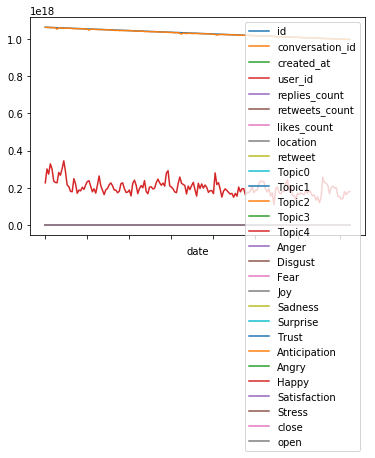

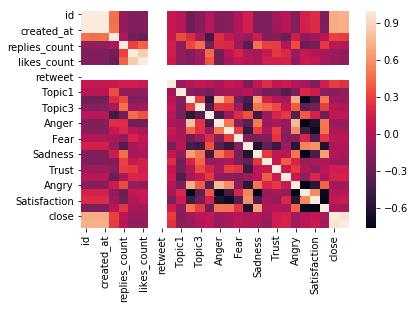

In [286]:
inpu = df['close']
print(inpu)
old_min = min(inpu)
old_range = max(inpu) - old_min
new_min = 0.00001
new_range = 0.999999 - new_min
output = [float((n - old_min) / old_range * new_range + new_min) for n in inpu]
df['close'] = output


inpu = df['open']
print(inpu)
old_min = min(inpu)
old_range = max(inpu) - old_min
new_min = 0.00001
new_range = 0.999999 - new_min
output = [float((n - old_min) / old_range * new_range + new_min) for n in inpu]
df['open'] = output


# df['close'].plot()
# df[['Topic0','Topic1','Topic2','Topic3','Topic4']].plot()
# plt.show()



# df.to_csv("msft_7rows.csv")
df.plot()
plt.show()
# df = df.drop('close', axis=1)
# df = df.drop('Topic0', axis=1)
# df = df.drop('Topic1', axis=1)
# df = df.drop('Topic2', axis=1)
# df = df.drop('Topic3', axis=1)
# df = df.drop('Topic4', axis=1)
# df.plot()
# # plt.gcf().set_size_inches(25, 35)
# plt.show()
cor = df.corr(method='spearman') #Calculate the correlation of the above variables
sns.heatmap(cor, square = False) #Plot the correlation as heat map